In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
# Importing the Google Colab files module and uploading an Excel file
cdc1 = pd.read_excel("C:/Users/sujik/OneDrive/Documents/MS - Data Science/Semester 3 (Fall_23)/MTH 522 - Advanced Mathematical Stats/Project 1/cdc-diabetes-2018.xlsx",sheet_name = 'Diabetes')
cdc1.head()

,YEAR,FIPS,COUNTY,STATEW,% DIABETIC
0,2018,1001,Autauga County,Alabama,9.5
1,2018,1003,Baldwin County,Alabama,8.4
2,2018,1005,Barbour County,Alabama,13.5
3,2018,1007,Bibb County,Alabama,10.2
4,2018,1009,Blount County,Alabama,10.5


In [3]:
#Read the data
cdc2 = pd.read_excel("C:/Users/sujik/OneDrive/Documents/MS - Data Science/Semester 3 (Fall_23)/MTH 522 - Advanced Mathematical Stats/Project 1/cdc-diabetes-2018.xlsx",sheet_name = 'Obesity')
cdc2.head()

,YEAR,FIPS,COUNTY,STATE,% OBESE
0,2018,1011,Bullock County,Alabama,18.7
1,2018,2068,Denali Borough,Alaska,18.9
2,2018,2105,Hoonah-Angoon Census Area,Alaska,19.4
3,2018,2195,Petersburg Census Area,Alaska,17.2
4,2018,2230,Skagway Municipality,Alaska,18.3


In [4]:
#Read the data for Obesity
cdc3 = pd.read_excel("C:/Users/sujik/OneDrive/Documents/MS - Data Science/Semester 3 (Fall_23)/MTH 522 - Advanced Mathematical Stats/Project 1/cdc-diabetes-2018.xlsx",sheet_name = 'Inactivity')
cdc3.head()

,YEAR,FIPDS,COUNTY,STATE,% INACTIVE
0,2018,1011,Bullock County,Alabama,17.0
1,2018,1029,Cleburne County,Alabama,19.3
2,2018,1037,Coosa County,Alabama,16.8
3,2018,1063,Greene County,Alabama,16.8
4,2018,2013,Aleutians East Borough,Alaska,19.2


In [5]:
# Rename the 'FIPDS' column to 'FIPS' in tab 3
cdc3.rename(columns={'FIPDS': 'FIPS'}, inplace=True)

# MERGE 2 TABS OF DATASET

In [6]:
# Merging dataframes cdc1 and cdc3 based on the 'FIPS' column using an inner join
cdc_dia_inact = pd.merge(cdc1, cdc3, on='FIPS', how='inner')

In [7]:
cdc_dia_inact

,YEAR_x,FIPS,COUNTY_x,STATEW,% DIABETIC,YEAR_y,COUNTY_y,STATE,% INACTIVE
0,2018,1011,Bullock County,Alabama,9.4,2018,Bullock County,Alabama,17.0
1,2018,1029,Cleburne County,Alabama,8.3,2018,Cleburne County,Alabama,19.3
2,2018,1037,Coosa County,Alabama,9.5,2018,Coosa County,Alabama,16.8
3,2018,1063,Greene County,Alabama,12.1,2018,Greene County,Alabama,16.8
4,2018,2013,Aleutians East Borough,Alaska,9.3,2018,Aleutians East Borough,Alaska,19.2
...,...,...,...,...,...,...,...,...,...
1365,2018,56027,Niobrara County,Wyoming,6.7,2018,Niobrara County,Wyoming,17.3
1366,2018,56031,Platte County,Wyoming,9.3,2018,Platte County,Wyoming,18.5
1367,2018,56033,Sheridan County,Wyoming,6.6,2018,Sheridan County,Wyoming,19.5
1368,2018,56035,Sublette County,Wyoming,6.8,2018,Sublette County,Wyoming,16.7


In [8]:
# Checking for null values in the dataframe cdc_dia_inact

null_values = cdc_dia_inact.isnull().sum()
print(null_values)

YEAR_x        0
FIPS          0
COUNTY_x      0
STATEW        0
% DIABETIC    0
YEAR_y        0
COUNTY_y      0
STATE         0
% INACTIVE    0
dtype: int64


In [9]:
# Find and display duplicate rows in cdc_dia_inact
duplicates = cdc_dia_inact[cdc_dia_inact.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [YEAR_x, FIPS, COUNTY_x, STATEW, % DIABETIC, YEAR_y, COUNTY_y, STATE, % INACTIVE]
Index: []


Kurtosis:  1.138793189854467
Skewness:  0.6593378810198804


count    1370.000000
mean        7.628832
std         1.016278
min         3.800000
25%         6.900000
50%         7.450000
75%         8.200000
max        12.100000
Name: % DIABETIC, dtype: float64

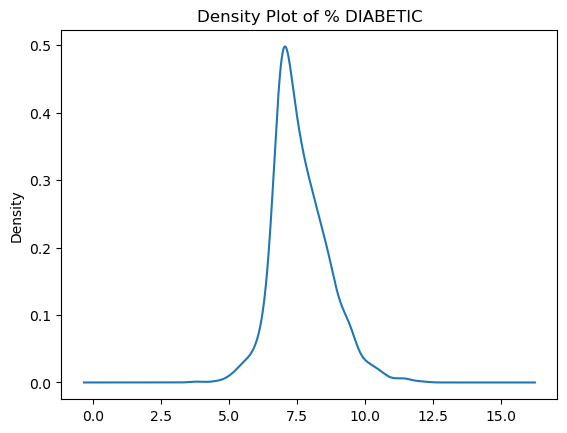

In [10]:
# Creating a kernel density plot for the '% DIABETIC' column, calculating kurtosis, skewness, and displaying descriptive statistics
cdc_dia_inact['% DIABETIC'].plot(kind = 'kde')
plt.title('Density Plot of % DIABETIC')
kurt=cdc_dia_inact['% DIABETIC'].kurtosis()
print('Kurtosis: ',kurt)
skew=cdc_dia_inact['% DIABETIC'].skew()
print('Skewness: ',skew)
cdc_dia_inact['% DIABETIC'].describe()

Text(0.5, 1.0, 'Box Plot of % DIABETIC')

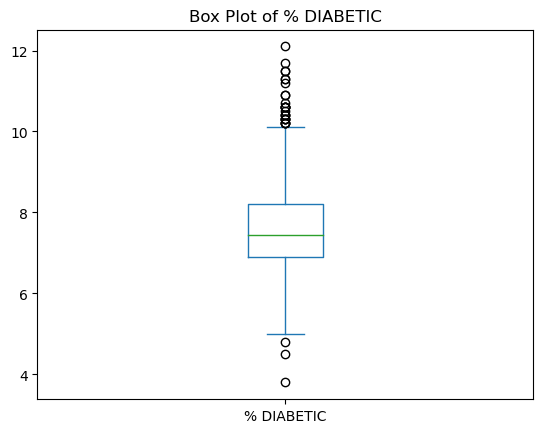

In [11]:
# Creating a box plot for the '% DIABETIC' column to visualize its distribution and statistical summary
cdc_dia_inact['% DIABETIC'].plot(kind='box')
plt.title('Box Plot of % DIABETIC')

Kurtosis:  -0.5466491902225425
Skewness:  -0.3424166225426183


count    1370.000000
mean       16.543358
std         1.926010
min         8.800000
25%        15.000000
50%        16.700000
75%        18.100000
max        19.500000
Name: % INACTIVE, dtype: float64

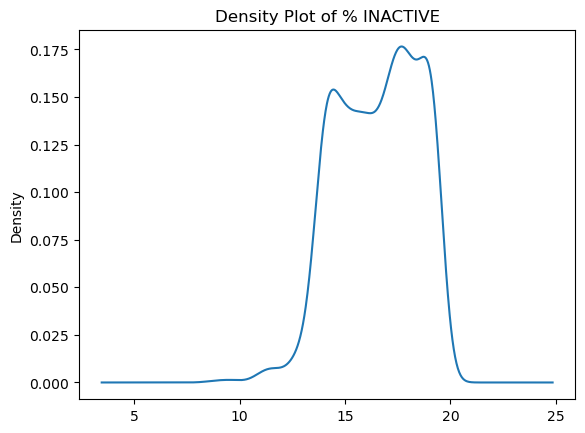

In [12]:
# Creating a kernel density plot for the '% INACTIVE' column, calculating kurtosis, skewness, and displaying descriptive statistics
cdc_dia_inact['% INACTIVE'].plot(kind = 'kde')
plt.title('Density Plot of % INACTIVE')
kurt=cdc_dia_inact['% INACTIVE'].kurtosis()
print('Kurtosis: ',kurt)
skew=cdc_dia_inact['% INACTIVE'].skew()
print('Skewness: ',skew)
cdc_dia_inact['% INACTIVE'].describe()

Text(0.5, 1.0, 'Box Plot of % INACTIVE')

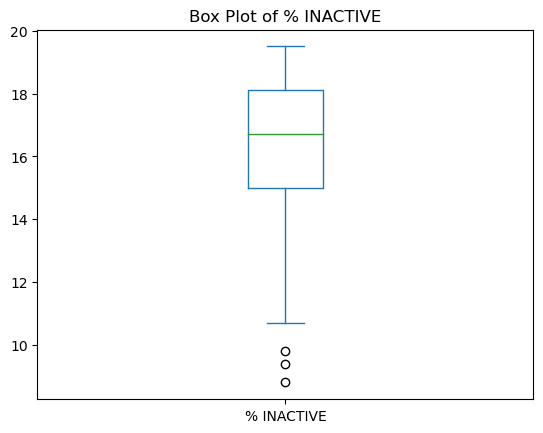

In [13]:
# Creating a box plot for the '% INACTIVE' column to visualize its distribution and statistical summary
cdc_dia_inact['% INACTIVE'].plot(kind='box')
plt.title('Box Plot of % INACTIVE')

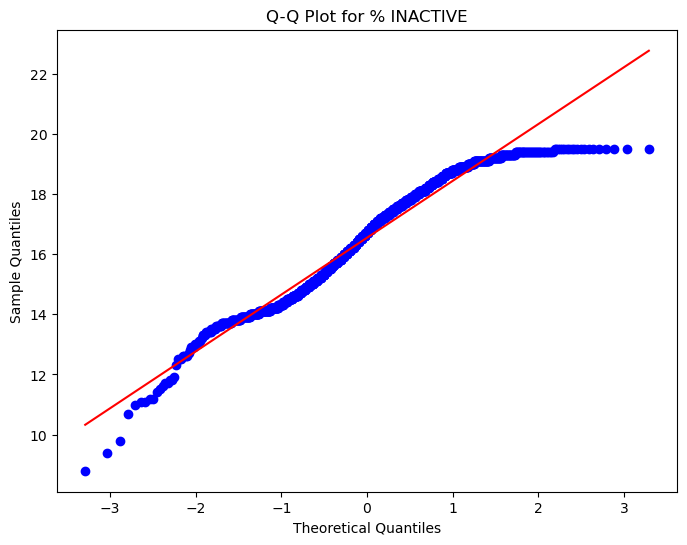

In [14]:
# Creating a Q-Q plot to assess the normality of the '% INACTIVE' distribution
import scipy.stats as stats

percent_inactive = cdc_dia_inact['% INACTIVE']

plt.figure(figsize=(8, 6))
stats.probplot(percent_inactive, dist="norm", plot=plt)
plt.title("Q-Q Plot for % INACTIVE")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [15]:
# Calculating the correlation matrix between '% DIABETIC' and '% INACTIVE' columns in cdc_dia_inact
cdc_dia_inact[['% DIABETIC','% INACTIVE']].corr()

,% DIABETIC,% INACTIVE
% DIABETIC,1.000000,0.441706
% INACTIVE,0.441706,1.000000


In [16]:
# Rename the columns to remove special characters
cdc_dia_inact.rename(columns={'% DIABETIC': 'DIABETIC', '% INACTIVE': 'INACTIVE'}, inplace=True)

Text(0.5, 1.0, 'Regression Plot of % INACTIVITY vs % DIABETES')

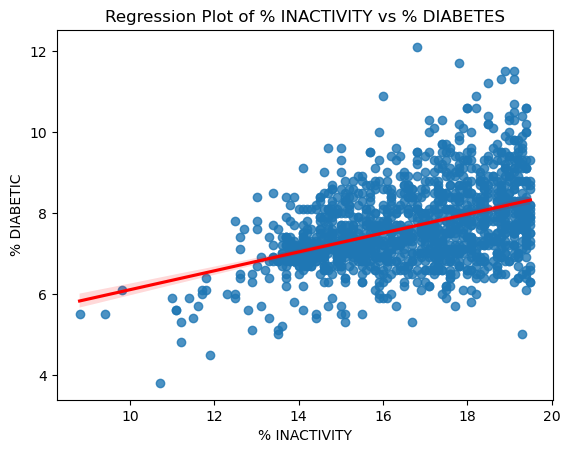

In [17]:
# Setting up matplotlib for inline plotting and creating a regression plot for '% INACTIVITY' vs '% DIABETIC' using seaborn
%matplotlib inline
sns.regplot(x="INACTIVE", y="DIABETIC", data=cdc_dia_inact, line_kws={"color": "red"});
plt.xlabel('% INACTIVITY')
plt.ylabel('% DIABETIC')
plt.title('Regression Plot of % INACTIVITY vs % DIABETES')

# SIMPLE LINEAR REGRESSION

In [18]:
#Creating a regression plot for '% INACTIVITY' vs '% DIABETIC'
import statsmodels.formula.api as smf
model_slr = smf.ols('DIABETIC ~ INACTIVE', data=cdc_dia_inact).fit()

In [19]:
model_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DIABETIC   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     331.6
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.63e-66
Time:                        19:40:26   Log-Likelihood:                -1816.9
No. Observations:                1370   AIC:                             3638.
Df Residuals:                    1368   BIC:                             3648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7731      0.213     17.700      0.000       3.355       4.191
INACTIVE       0.2331      0.013     18.210      0.000       0.208       0.258
==============================================================================
Omnibus:                       84.967   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.798
Skew:                           0.511   Prob(JB):                     4.82e-28
Kurtosis:                       4.076   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
import statsmodels.api as sm

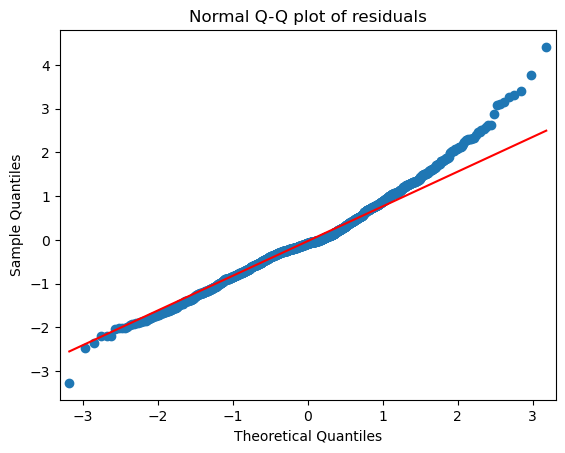

In [21]:
# Creating a normal Q-Q plot of residuals from a simple linear regression model
qqplot = sm.qqplot(model_slr.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Kurtosis:  1.0848283912419339
Skewness:  0.5116675615090468


count    1.370000e+03
mean     7.987123e-16
std      9.117636e-01
min     -3.271324e+00
25%     -5.621521e-01
50%     -8.187604e-02
75%      5.076127e-01
max      4.411352e+00
dtype: float64

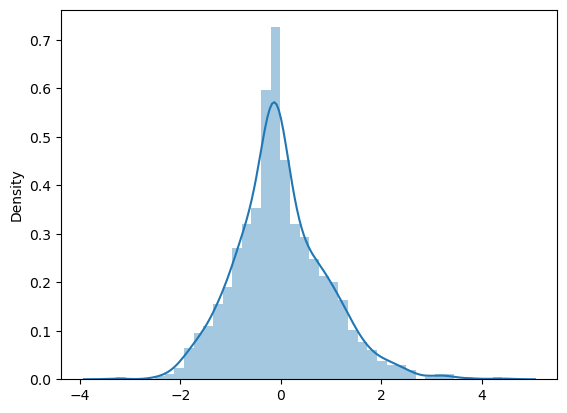

In [22]:
# Plotting the distribution of residuals from a simple linear regression model, calculating kurtosis, skewness, and displaying descriptive statistics
import warnings
warnings.filterwarnings("ignore")
sns.distplot(model_slr.resid)
kurt=model_slr.resid.kurtosis()
print('Kurtosis: ',kurt)
skew=model_slr.resid.skew()
print('Skewness: ',skew)
model_slr.resid.describe()

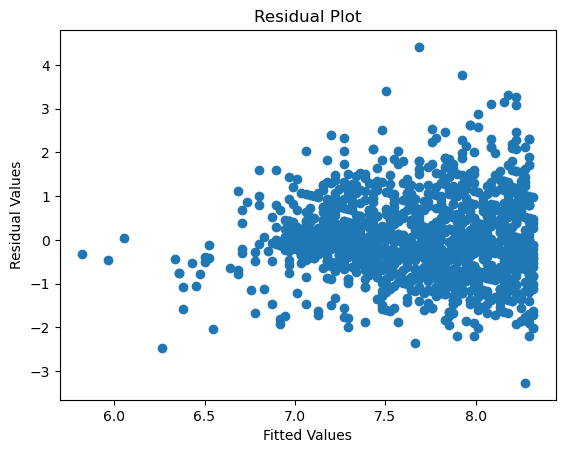

In [23]:
# Creating a scatter plot of residuals against fitted values to assess the homoscedasticity of a simple linear regression model
plt.scatter(model_slr.fittedvalues,
            model_slr.resid)

plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.show()

# BREUSCH-PAGAN TEST

In [24]:
# Test for heteroscedasticity using the Breusch-Pagan test
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(model_slr.resid, model_slr.model.exog)

In [25]:
print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))

Lagrange multiplier statistic: 52.846460747754506
Lagrange multiplier p-value:   3.6066798910958464e-13
F-statistic:                   54.88650802545753
P-value of F-statistic:        2.2260298751109223e-13


In [26]:
# Check for heteroscedasticity by comparing the Breusch-Pagan p-value to the significance level
if bp_lm_pvalue < 0.05:
    print("Heteroscedasticity detected")
else:
    print("No heteroscedasticity detected")

Heteroscedasticity detected


# MERGE 3 TABS OF DATASET

In [27]:
cdc_dia_inact = pd.merge(cdc2, cdc_dia_inact, on='FIPS', how='inner')

In [28]:
cdc_dia_inact.rename(columns={'% OBESE': 'OBESE', 'STATE_x': 'STATE', 'YEAR_x': 'YEAR', 'COUNTY_x': 'COUNTY'}, inplace=True)
cdc_dia_inact

,YEAR,FIPS,COUNTY,STATE,OBESE,YEAR,COUNTY,STATEW,DIABETIC,YEAR_y,COUNTY_y,STATE_y,INACTIVE
0,2018,1011,Bullock County,Alabama,18.7,2018,Bullock County,Alabama,9.4,2018,Bullock County,Alabama,17.0
1,2018,2068,Denali Borough,Alaska,18.9,2018,Denali Borough,Alaska,6.8,2018,Denali Borough,Alaska,16.2
2,2018,2105,Hoonah-Angoon Census Area,Alaska,19.4,2018,Hoonah-Angoon Census Area,Alaska,7.3,2018,Hoonah-Angoon Census Area,Alaska,15.0
3,2018,2195,Petersburg Census Area,Alaska,17.2,2018,Petersburg Census Area,Alaska,9.2,2018,Petersburg Census Area,Alaska,17.8
4,2018,2230,Skagway Municipality,Alaska,18.3,2018,Skagway Municipality,Alaska,6.6,2018,Skagway Municipality,Alaska,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2018,51820,Waynesboro City,Virginia,19.5,2018,Waynesboro City,Virginia,8.6,2018,Waynesboro City,Virginia,16.6
350,2018,51830,Williamsburg City,Virginia,18.0,2018,Williamsburg City,Virginia,8.5,2018,Williamsburg City,Virginia,15.7
351,2018,51840,Winchester City,Virginia,19.4,2018,Winchester City,Virginia,6.9,2018,Winchester City,Virginia,16.1
352,2018,53055,San Juan County,Washington,19.3,2018,San Juan County,Washington,4.5,2018,San Juan County,Washington,11.9


In [29]:
cdc_dia_inact=cdc_dia_inact.iloc[:,[0,1,2,3,4,8,12]]

In [30]:
cdc_dia_inact

,YEAR,FIPS,COUNTY,STATE,OBESE,DIABETIC,INACTIVE
0,2018,1011,Bullock County,Alabama,18.7,9.4,17.0
1,2018,2068,Denali Borough,Alaska,18.9,6.8,16.2
2,2018,2105,Hoonah-Angoon Census Area,Alaska,19.4,7.3,15.0
3,2018,2195,Petersburg Census Area,Alaska,17.2,9.2,17.8
4,2018,2230,Skagway Municipality,Alaska,18.3,6.6,15.8
...,...,...,...,...,...,...,...
349,2018,51820,Waynesboro City,Virginia,19.5,8.6,16.6
350,2018,51830,Williamsburg City,Virginia,18.0,8.5,15.7
351,2018,51840,Winchester City,Virginia,19.4,6.9,16.1
352,2018,53055,San Juan County,Washington,19.3,4.5,11.9


Kurtosis:  2.8453538447782454
Skewness:  -0.04901992519058829


count    354.000000
mean       7.115819
std        0.728442
min        3.800000
25%        6.800000
50%        7.000000
75%        7.400000
max        9.700000
Name: DIABETIC, dtype: float64

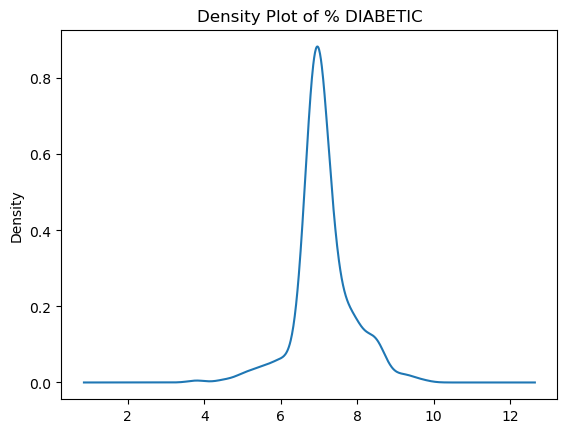

In [31]:
# Create a kernel density plot, calculate kurtosis and skewness, and display descriptive statistics for the '% DIABETIC' column
cdc_dia_inact['DIABETIC'].plot(kind = 'kde')
plt.title('Density Plot of % DIABETIC')
kurt=cdc_dia_inact['DIABETIC'].kurtosis()
print('Kurtosis: ',kurt)
skew=cdc_dia_inact['DIABETIC'].skew()
print('Skewness: ',skew)
cdc_dia_inact['DIABETIC'].describe()

Text(0.5, 1.0, 'Box Plot of % DIABETIC')

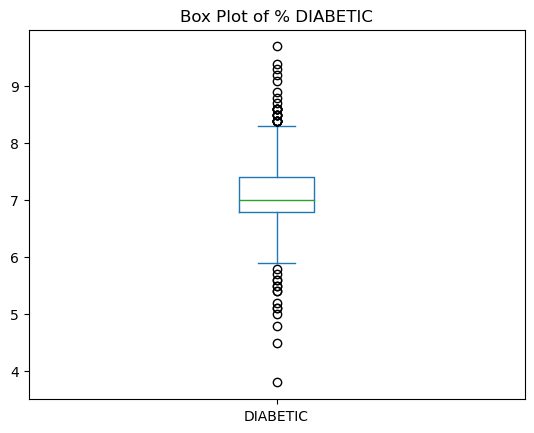

In [32]:
#Create a box plot for the '% DIABETIC' column to visualize its distribution and statistical summary
cdc_dia_inact['DIABETIC'].plot(kind='box')
plt.title('Box Plot of % DIABETIC')

Kurtosis:  1.653768268371849
Skewness:  0.4275250425041126


count    354.000000
mean      14.776271
std        1.544542
min        8.800000
25%       14.000000
50%       14.400000
75%       15.475000
max       19.400000
Name: INACTIVE, dtype: float64

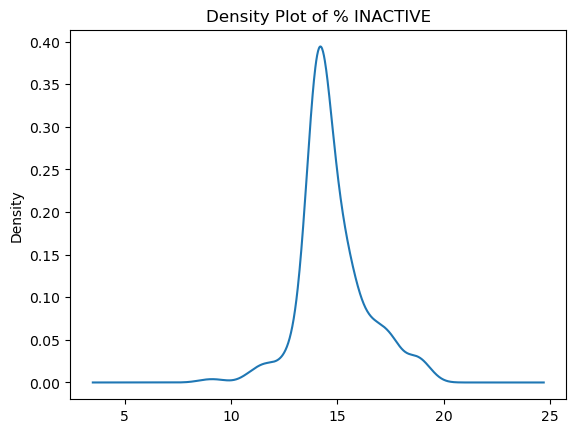

In [33]:
# Create a kernel density plot, calculate kurtosis and skewness, and display descriptive statistics for the '% INACTIVE' column
cdc_dia_inact['INACTIVE'].plot(kind = 'kde')
plt.title('Density Plot of % INACTIVE')
kurt=cdc_dia_inact['INACTIVE'].kurtosis()
print('Kurtosis: ',kurt)
skew=cdc_dia_inact['INACTIVE'].skew()
print('Skewness: ',skew)
cdc_dia_inact['INACTIVE'].describe()

Text(0.5, 1.0, 'Box Plot of % INACTIVE')

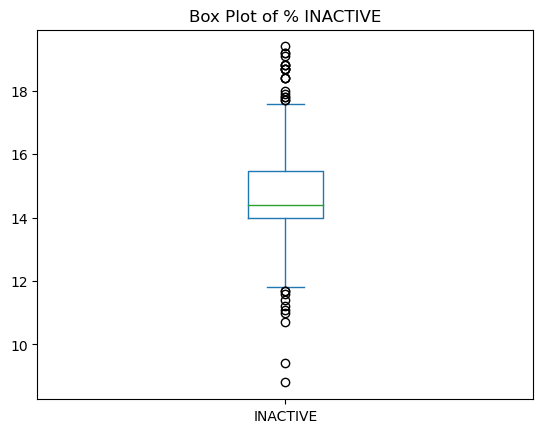

In [34]:
# Create a box plot for the '% INACTIVE' column to visualize its distribution and statistical summary
cdc_dia_inact['INACTIVE'].plot(kind='box')
plt.title('Box Plot of % INACTIVE')

Kurtosis:  13.133191275035259
Skewness:  -2.763612690255827


count    354.000000
mean      18.252542
std        1.029484
min       10.500000
25%       17.900000
50%       18.300000
75%       18.975000
max       19.500000
Name: OBESE, dtype: float64

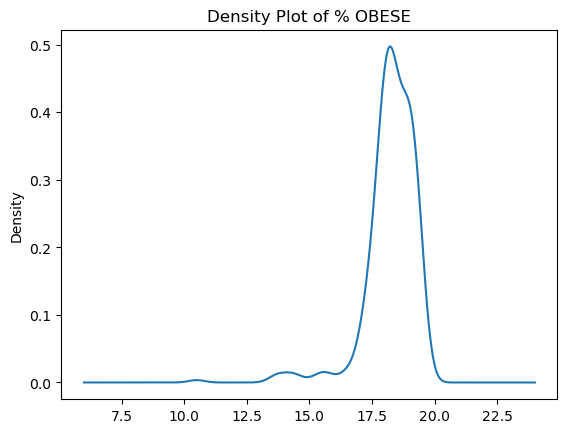

In [35]:
# Create a kernel density plot, calculate kurtosis and skewness, and display descriptive statistics for the '% OBESE' column
cdc_dia_inact['OBESE'].plot(kind = 'kde')
plt.title('Density Plot of % OBESE')
kurt=cdc_dia_inact['OBESE'].kurtosis()
print('Kurtosis: ',kurt)
skew=cdc_dia_inact['OBESE'].skew()
print('Skewness: ',skew)
cdc_dia_inact['OBESE'].describe()

Text(0.5, 1.0, 'Box Plot of % OBESE')

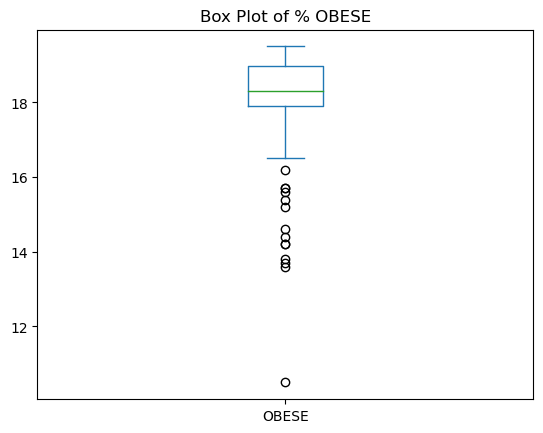

In [36]:
# Create a kernel density plot, calculate kurtosis and skewness, and display descriptive statistics for the '% OBESE' column
cdc_dia_inact['OBESE'].plot(kind='box')
plt.title('Box Plot of % OBESE')

In [37]:
#Finding the correlation between INACTIVE, OBESE and DIABETES
cdc_dia_inact[['DIABETIC','INACTIVE', 'OBESE']].corr()

,DIABETIC,INACTIVE,OBESE
DIABETIC,1.000000,0.567104,0.389941
INACTIVE,0.567104,1.000000,0.472656
OBESE,0.389941,0.472656,1.000000


# MULTIPLE LINEAR REGRESSION

In [38]:
#Fit a multiple linear regression model predicting 'DIABETIC' based on 'INACTIVE' and 'OBESE' in cdc_dia_inact
model_mlr = smf.ols('DIABETIC ~ INACTIVE + OBESE', data=cdc_dia_inact).fit()

In [39]:
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DIABETIC   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     90.71
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.76e-32
Time:                        19:40:30   Log-Likelihood:                -315.89
No. Observations:                 354   AIC:                             637.8
Df Residuals:                     351   BIC:                             649.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6536      0.562      2.941      0.003       0.548       2.759
INACTIVE       0.2325      0.023     10.023      0.000       0.187       0.278
OBESE          0.1111      0.035      3.192      0.002       0.043       0.180
==============================================================================
Omnibus:                       17.281   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.622
Skew:                          -0.042   Prob(JB):                     1.24e-10
Kurtosis:                       4.757   Cond. No.                         421.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Kurtosis:  13.133191275035259
Skewness:  -0.04195412250154302


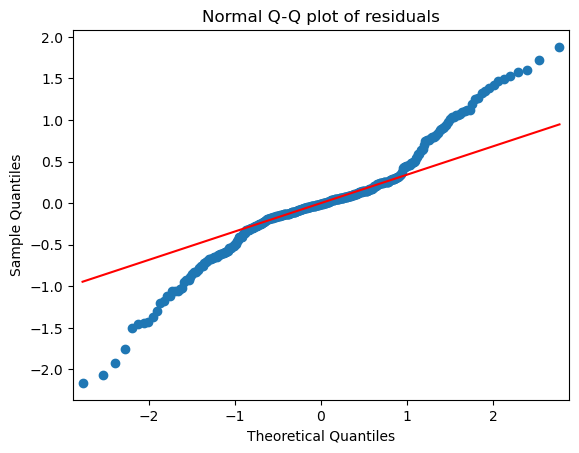

In [40]:
# Calculate kurtosis, skewness, and display descriptive statistics for residuals of a multiple linear regression model
print('Kurtosis: ',kurt)
skew=model_mlr.resid.skew()
print('Skewness: ',skew)
model_mlr.resid.describe()
# Create a normal Q-Q plot of residuals using statsmodels.qqplot
qqplot=sm.qqplot(model_mlr.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

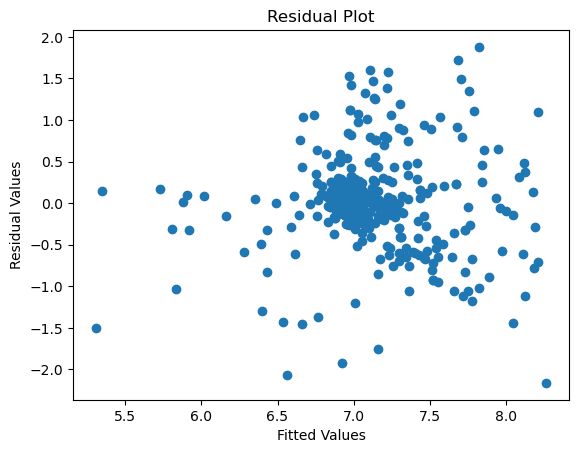

In [41]:
# Create a scatter plot of residuals against fitted values to assess the homoscedasticity of a multiple linear regression model
plt.scatter(model_mlr.fittedvalues,
            model_mlr.resid)

plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.show()

# MULTIPLE LINEAR REGRESSION WITH INTERACTION TERM

In [42]:
# Create a new column 'OBESE*INACTIVE' by multiplying 'INACTIVE' and 'OBESE' columns in cdc_dia_inact
cdc_dia_inact['OBESE*INACTIVE']=cdc_dia_inact['INACTIVE']*cdc_dia_inact['OBESE']
cdc_dia_inact

,YEAR,FIPS,COUNTY,STATE,OBESE,DIABETIC,INACTIVE,OBESE*INACTIVE
0,2018,1011,Bullock County,Alabama,18.7,9.4,17.0,317.90
1,2018,2068,Denali Borough,Alaska,18.9,6.8,16.2,306.18
2,2018,2105,Hoonah-Angoon Census Area,Alaska,19.4,7.3,15.0,291.00
3,2018,2195,Petersburg Census Area,Alaska,17.2,9.2,17.8,306.16
4,2018,2230,Skagway Municipality,Alaska,18.3,6.6,15.8,289.14
...,...,...,...,...,...,...,...,...
349,2018,51820,Waynesboro City,Virginia,19.5,8.6,16.6,323.70
350,2018,51830,Williamsburg City,Virginia,18.0,8.5,15.7,282.60
351,2018,51840,Winchester City,Virginia,19.4,6.9,16.1,312.34
352,2018,53055,San Juan County,Washington,19.3,4.5,11.9,229.67


In [43]:
# Fit a linear regression model including interaction term 'OBESE*INACTIVE'
model_int = smf.ols("DIABETIC ~ INACTIVE+OBESE+OBESE*INACTIVE",data = cdc_dia_inact).fit()

In [44]:
model_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DIABETIC   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     66.94
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           3.11e-34
Time:                        19:40:31   Log-Likelihood:                -309.37
No. Observations:                 354   AIC:                             626.7
Df Residuals:                     350   BIC:                             642.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.0647      3.280     -3.068      0.002     -16.516      -3.613
INACTIVE           1.1534      0.255      4.521      0.000       0.652       1.655
OBESE              0.7430      0.178      4.182      0.000       0.394       1.093
OBESE:INACTIVE    -0.0496      0.014     -3.624      0.000      -0.077      -0.023
==============================================================================
Omnibus:                       17.360   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.120
Skew:                          -0.034   Prob(JB):                     9.66e-11
Kurtosis:                       4.767   Cond. No.                     2.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# POLYNOMIAL REGRESSION (QUADRATIC MODEL WITH INTERACTION TERM)

In [45]:
# Create a new column 'INACTIVE_sq' by squaring the 'INACTIVE' column in cdc_dia_inact
cdc_dia_inact['INACTIVE_sq']=cdc_dia_inact['INACTIVE']*cdc_dia_inact['INACTIVE']
cdc_dia_inact

,YEAR,FIPS,COUNTY,STATE,OBESE,DIABETIC,INACTIVE,OBESE*INACTIVE,INACTIVE_sq
0,2018,1011,Bullock County,Alabama,18.7,9.4,17.0,317.90,289.00
1,2018,2068,Denali Borough,Alaska,18.9,6.8,16.2,306.18,262.44
2,2018,2105,Hoonah-Angoon Census Area,Alaska,19.4,7.3,15.0,291.00,225.00
3,2018,2195,Petersburg Census Area,Alaska,17.2,9.2,17.8,306.16,316.84
4,2018,2230,Skagway Municipality,Alaska,18.3,6.6,15.8,289.14,249.64
...,...,...,...,...,...,...,...,...,...
349,2018,51820,Waynesboro City,Virginia,19.5,8.6,16.6,323.70,275.56
350,2018,51830,Williamsburg City,Virginia,18.0,8.5,15.7,282.60,246.49
351,2018,51840,Winchester City,Virginia,19.4,6.9,16.1,312.34,259.21
352,2018,53055,San Juan County,Washington,19.3,4.5,11.9,229.67,141.61


In [46]:
# Create a new column 'OBESE_sq' by squaring the 'OBESE' column in cdc_dia_inact
cdc_dia_inact['OBESE_sq']=cdc_dia_inact['OBESE']*cdc_dia_inact['OBESE']
cdc_dia_inact

,YEAR,FIPS,COUNTY,STATE,OBESE,DIABETIC,INACTIVE,OBESE*INACTIVE,INACTIVE_sq,OBESE_sq
0,2018,1011,Bullock County,Alabama,18.7,9.4,17.0,317.90,289.00,349.69
1,2018,2068,Denali Borough,Alaska,18.9,6.8,16.2,306.18,262.44,357.21
2,2018,2105,Hoonah-Angoon Census Area,Alaska,19.4,7.3,15.0,291.00,225.00,376.36
3,2018,2195,Petersburg Census Area,Alaska,17.2,9.2,17.8,306.16,316.84,295.84
4,2018,2230,Skagway Municipality,Alaska,18.3,6.6,15.8,289.14,249.64,334.89
...,...,...,...,...,...,...,...,...,...,...
349,2018,51820,Waynesboro City,Virginia,19.5,8.6,16.6,323.70,275.56,380.25
350,2018,51830,Williamsburg City,Virginia,18.0,8.5,15.7,282.60,246.49,324.00
351,2018,51840,Winchester City,Virginia,19.4,6.9,16.1,312.34,259.21,376.36
352,2018,53055,San Juan County,Washington,19.3,4.5,11.9,229.67,141.61,372.49


In [47]:
# Fit a linear regression model including squared terms 'OBESE_sq' and 'INACTIVE_sq'
model_pol = smf.ols("DIABETIC ~ INACTIVE+OBESE+OBESE*INACTIVE+OBESE_sq+INACTIVE_sq",data = cdc_dia_inact).fit()

In [48]:
model_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DIABETIC   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     43.52
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           8.42e-35
Time:                        19:40:31   Log-Likelihood:                -303.68
No. Observations:                 354   AIC:                             619.4
Df Residuals:                     348   BIC:                             642.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -11.5906      3.317     -3.494      0.001     -18.115      -5.067
INACTIVE           0.4779      0.430      1.110      0.268      -0.369       1.324
OBESE              1.4897      0.419      3.553      0.000       0.665       2.314
OBESE:INACTIVE     0.0197      0.025      0.786      0.433      -0.030       0.069
OBESE_sq          -0.0494      0.018     -2.717      0.007      -0.085      -0.014
INACTIVE_sq       -0.0197      0.009     -2.282      0.023      -0.037      -0.003
==============================================================================
Omnibus:                       15.215   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.981
Skew:                           0.148   Prob(JB):                     6.89e-08
Kurtosis:                       4.466   Cond. No.                     5.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# TRAINING ERROR VS MODEL COMPLEXITY

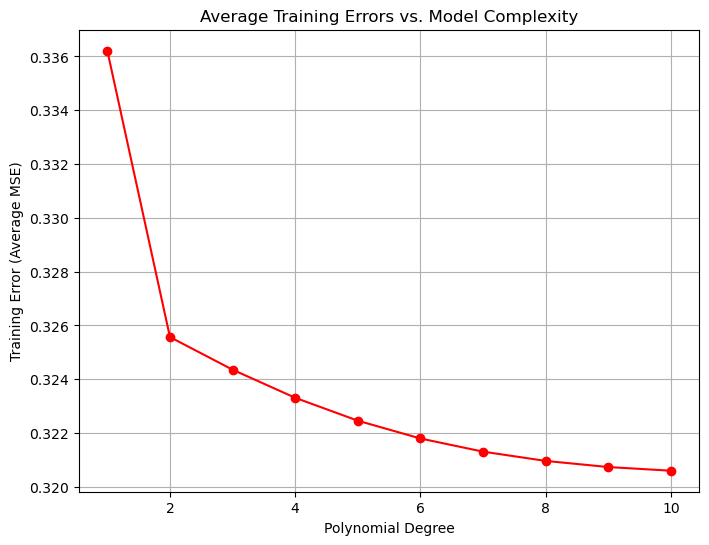

In [49]:
# Calculate and plot average training errors for polynomial regression models of varying degrees
def calculate_training_error(model, X, y):
    y_pred = model.predict(X)
    residuals = y - y_pred
    mse = np.mean(residuals ** 2)
    return mse

degrees = range(1, 11)
training_errors = []

for degree in degrees:
    if degree == 1:
        formula = "DIABETIC ~ INACTIVE + OBESE + INACTIVE*OBESE"
    else:
        formula = f"DIABETIC ~ INACTIVE + OBESE + INACTIVE*OBESE + I(INACTIVE ** {degree}) + I(OBESE ** {degree})"

    model = smf.ols(formula, data=cdc_dia_inact).fit()
    training_error = calculate_training_error(model, cdc_dia_inact, cdc_dia_inact['DIABETIC'])
    training_errors.append(training_error)


plt.figure(figsize=(8, 6))
plt.plot(degrees, training_errors, marker='o', linestyle='-', color='r')
plt.title('Average Training Errors vs. Model Complexity')
plt.xlabel('Polynomial Degree')
plt.ylabel('Training Error (Average MSE)')
plt.grid(True)
plt.show()


# TEST ERROR VS MODEL COMPLEXITY

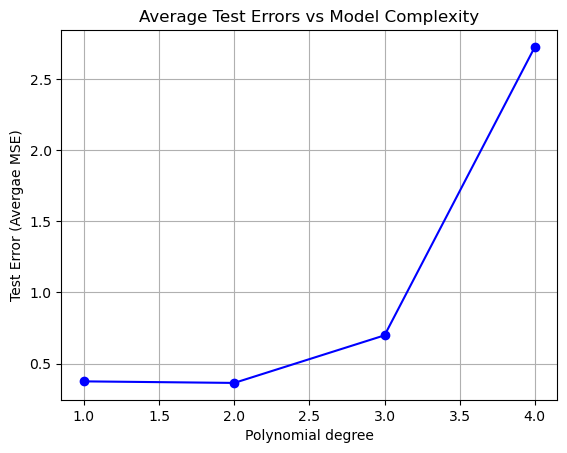

In [50]:
# Perform k-fold cross-validation for polynomial regression models of varying degrees and plot average test errors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X = cdc_dia_inact[["INACTIVE", "OBESE"]]
y = cdc_dia_inact["DIABETIC"]


degrees = [1, 2, 3, 4]

num_folds = 5

mse_values = []

kf = KFold(n_splits=num_folds)

for degree in degrees:
    mse_fold = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)

        mse_fold += mean_squared_error(y_test, y_pred)

    average_mse = mse_fold / num_folds
    mse_values.append((degree, average_mse))

mse_values = np.array(mse_values)
plt.plot(mse_values[:, 0], mse_values[:, 1], marker='o', linestyle='-', color='b')
plt.xlabel("Polynomial degree")
plt.ylabel("Test Error (Avergae MSE)")
plt.title("Average Test Errors vs Model Complexity")
plt.grid(True)
plt.show()

# SUPPORT VECTOR REGRESSION ON QUADRATIC MODEL WITH INTERACTION TERM (5-FOLD CV)

In [51]:
# Support Vector Regression (SVR) modeling using radial basis function kernel with 5-fold cross-validation and mean R-squared calculation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, r2_score
from sklearn.datasets import make_regression

svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)

X1 = cdc_dia_inact["INACTIVE"].values.reshape(-1, 1)
X2 = cdc_dia_inact["OBESE"].values.reshape(-1, 1)
X3 = cdc_dia_inact["INACTIVE_sq"].values.reshape(-1, 1)
X4 = cdc_dia_inact["OBESE_sq"].values.reshape(-1, 1)
X5 = cdc_dia_inact["OBESE*INACTIVE"].values.reshape(-1, 1)
X = np.concatenate((X1, X2, X3, X4, X5), axis=1)
y = cdc_dia_inact["DIABETIC"].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)

    svr.fit(X_train, y_train)

    y_pred = svr.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

mean_r2_score = np.mean(r2_scores)
print("Mean R-squared from 5-fold cross-validation:", mean_r2_score)

Mean R-squared from 5-fold cross-validation: 0.3018752502598323
